In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
base_dir = '/content/drive/My Drive/uangno'
!ls "/content/drive/My Drive/uangno/"

bahan  latih  validasi


In [ ]:
#menentukan direktori
bahan_dir = os.path.join(base_dir,'bahan')
train_dir = os.path.join(base_dir,'latih')
validation_dir = os.path.join(base_dir,'validasi')

In [ ]:
#menentukan direktori isi bahan
lima_dir = os.path.join(bahan_dir,'limaribu/')
sepuluh_dir = os.path.join(bahan_dir,'sepuluhribu/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar uang 5.000  :',len(os.listdir(lima_dir)))
print('Jumlah gambar uang 10.000 :',len(os.listdir(sepuluh_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar uang 5.000  : 115
Jumlah gambar uang 10.000 : 102


In [ ]:
# Direktori isi latih/training
train_lima = os.path.join(train_dir,'limaribu/')
train_sepuluh = os.path.join(train_dir, 'sepuluhribu/')

# Direktori isi validasi
validation_lima = os.path.join(validation_dir,'limaribu/')
validation_sepuluh = os.path.join(validation_dir,'sepuluhribu/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.9

#Pembagian Training dan Validasi
#Training
source_00 = lima_dir
train_00 = train_lima
val_00 = validation_lima
train_val_split(source_00, train_00, val_00, train_ratio)

# Validasi
source_01 = sepuluh_dir
train_01 = train_sepuluh
val_01 = validation_sepuluh
train_val_split(source_01, train_01, val_01, train_ratio)

In [ ]:
print('Jumlah All Lima Ribu   :', len(os.listdir(lima_dir)))
print('Jumlah Train Lima Ribu :', len(os.listdir(train_lima)))
print('Jumlah Val Lima ribu   :', len(os.listdir(validation_lima)))

Jumlah All Lima Ribu   : 115
Jumlah Train Lima Ribu : 103
Jumlah Val Lima ribu   : 12


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size= (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 194 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3,seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5,seed=112),
          tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer ='Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch = 9,
            epochs = 10,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/10
9/9 [==============================] - 55s 6s/step - loss: 0.6317 - accuracy: 0.6778 - val_loss: 0.4558 - val_accuracy: 0.6000
Epoch 2/10
9/9 [==============================] - 54s 6s/step - loss: 0.5469 - accuracy: 0.7333 - val_loss: 0.4775 - val_accuracy: 0.8000
Epoch 3/10
9/9 [==============================] - 52s 6s/step - loss: 0.3486 - accuracy: 0.8810 - val_loss: 0.1510 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 55s 6s/step - loss: 0.0598 - accuracy: 0.9889 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 51s 6s/step - loss: 0.1329 - accuracy: 0.9405 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 52s 6s/step - loss: 0.0539 - accuracy: 0.9643 - val_loss: 0.1249 - val_accuracy: 0.9000
Epoch 7/10
9/9 [==============================] - 54s 6s/step - loss: 0.0416 - accuracy: 0.9762 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==================

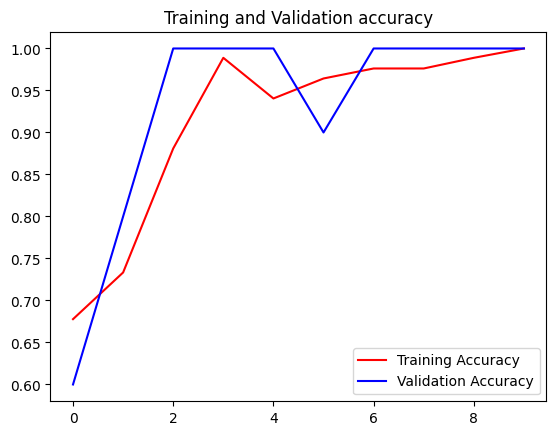

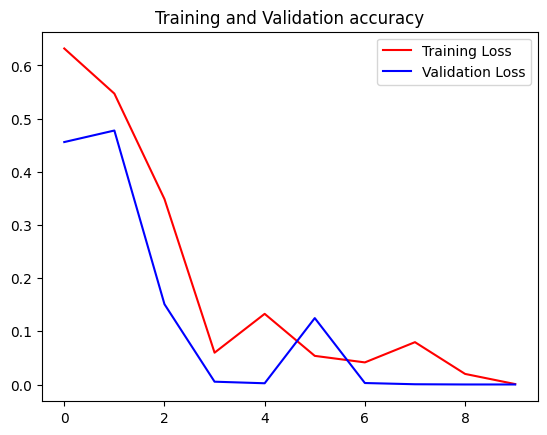

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label ='Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

Saving test5k.png to test5k.png
1/1 [==============================] - 0s 30ms/step
test5k.png
This inage belongs to class limaribu


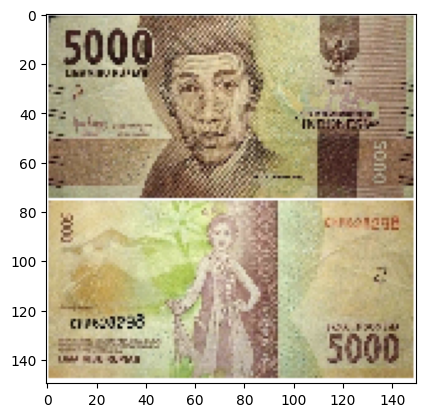

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This inage belongs to class', class_list[j-1])
      break

Saving test10k.jpg to test10k (1).jpg
1/1 [==============================] - 0s 54ms/step
test10k (1).jpg
This inage belongs to class sepuluhribu


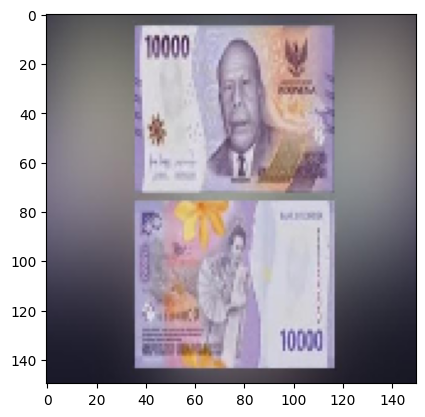

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This inage belongs to class', class_list[j-1])
      break